<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Introduction to Machine Learning</h1><h2>Universal Workflow of Machine Learning - Demo 2</h2><h3>The Data School</h3></th>
    </tr>
</table>

## Objectives
##### After completing this practical demo, you should be able to:
1. [Perform Data Preparation on a Dataset](#p1)
2. [Train a Simple Regression Machine Learning Model](#p2)
3. [Fine Tune a Simple Regression Model](#p3)
4. [Evaluate a Regression Machine Learning Model](#p4)
5. [Save a Trained Model for Future Use](#p5)

## 1. Perform Data Preparation on a Dataset <a id='p1' />
### 1.1 Importing data from CSV file into a Pandas DataFrame

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

In [2]:
#Load the Boston Housing Data Set from sklearn.datasets and print it
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.data) # view data of features
print(boston.feature_names) # view column names
print(boston.target) # view housing prices

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22

In [4]:
# Create dataframes for input features (X) and target output (y)
dfX = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ["PRICE"])

In [5]:
# View first 5 records of the DataFrame
dfX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 1.2. Examine the State of the Data

In [6]:
# View number of items and data type of each column
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
PRICE    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


In [8]:
# Sort dfX columns in alphabetical order
dfX = dfX.reindex(sorted(dfX.columns), axis=1)
dfX.head()

,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,65.2,396.90,0.0,0.00632,4.0900,2.31,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,78.9,396.90,0.0,0.02731,4.9671,7.07,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,392.83,0.0,0.02729,4.9671,7.07,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,45.8,394.63,0.0,0.03237,6.0622,2.18,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,396.90,0.0,0.06905,6.0622,2.18,5.33,0.458,18.7,3.0,7.147,222.0,0.0


### 1.3 Basic Statistical Analysis

In [9]:
# View five-number summary of numeric variables
dfX.describe()

,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,0.069170,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,6.284634,408.237154,11.363636
std,28.148861,91.294864,0.253994,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,0.702617,168.537116,23.322453
min,2.900000,0.320000,0.000000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,3.561000,187.000000,0.000000
25%,45.025000,375.377500,0.000000,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,5.885500,279.000000,0.000000
50%,77.500000,391.440000,0.000000,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,6.208500,330.000000,0.000000
75%,94.075000,396.225000,0.000000,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,6.623500,666.000000,12.500000
max,100.000000,396.900000,1.000000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,8.780000,711.000000,100.000000


In [10]:
# View five-number summary of target variable
dfy.describe()

,PRICE
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


## 2. Training a Simple Regression Machine Learning Model <a id='p2' />

Let us train a simple Multiple Linear Regression model to predict housing price based on the Boston housing dataset.

In [11]:
# import required libraries 
# for modelling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import random

# for visualisation
import matplotlib.pyplot as plt 
%matplotlib inline

### 2.1 Define Model Inputs (X) & Output (y)

In [12]:
# Convert dfX & dfy (Pandas Dataframes) to X & y (Numpy Arrays) for modelling purpose
X = dfX.values
y = dfy.values

In [13]:
# Split both Inputs (X) and Output (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Random state ensure consistent random samples are selected

### 2.1 Train a Base Model

In [14]:
#Initialize the linear regression model
lm = linear_model.LinearRegression()

# Fit the model to the training set
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Recall equation for multiple linear regression: `y = b0 + b1.x1 + b2.x2 + ... + b13.x13`

In [15]:
# Display coefficient value of each input feature
print(dfX.columns)
lm.coef_

Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')


array([[ 1.89769212e-02,  1.25396786e-02,  3.19555762e+00,
        -9.32979504e-02, -1.26552555e+00, -1.81754255e-02,
        -6.07618971e-01, -1.51042926e+01, -1.08963451e+00,
         3.22156319e-01,  3.50102142e+00, -1.09456764e-02,
         3.11368143e-02]])

In [16]:
# Display intercept (b0) of lm model
lm.intercept_

array([37.1625413])

In [17]:
# Display the R-squared value of the regression model
lm.score(X_test, y_test)

0.7330247212691926

In [18]:
# Calculate the fitted values for training set
y_fitted = lm.predict(X_train) # returns housing price fitted to lm model
y_fitted

array([[22.59264407],
       [33.43591624],
       [20.57260562],
       [20.87032745],
       [20.96336386],
       [21.67859636],
       [26.96872909],
       [33.07981034],
       [25.75420221],
       [32.44484226],
       [20.98756151],
       [41.08622409],
       [15.54043479],
       [ 9.31516691],
       [23.41247705],
       [13.18057863],
       [28.89268771],
       [16.77230332],
       [26.56279793],
       [39.27551713],
       [34.86324692],
       [35.25569317],
       [22.10523467],
       [29.22205188],
       [24.92886717],
       [43.12511664],
       [19.58096762],
       [22.92892649],
       [17.21831688],
       [27.37541209],
       [34.35808417],
       [26.05550016],
       [27.23249907],
       [23.60848248],
       [38.65539061],
       [20.89023593],
       [32.98193239],
       [32.54116136],
       [-5.21297056],
       [19.876661  ],
       [17.37875785],
       [11.59315301],
       [24.19183415],
       [40.08085683],
       [34.59211808],
       [15

In [19]:
# Use the lm model to perform prediction on test data and save the predicted output
y_pred = lm.predict(X_test)

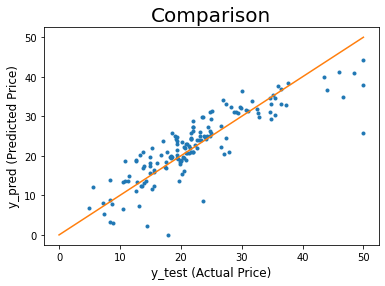

In [20]:
# Plot the y_test (actual price) against the y_pred (predicted price)
# Set x and y tick values
x_axis = np.linspace(0, 50, 50)
y_axis = x_axis

# Plot y_test vs y_pred chart
plt.plot(y_test, y_pred, '.')
plt.title(label='Comparison', fontsize=20)
plt.xlabel(xlabel='y_test (Actual Price)', fontsize=12)
plt.ylabel(ylabel='y_pred (Predicted Price)', fontsize=12)
plt.plot(x_axis, y_axis)
plt.show()

## 3. Fine Tune a Simple Regression Model <a id='p3' />

To fine tune the model, we need to utilize the `statsmodel` package to find out the p-value for each coefficient so as to understand our confidence levels on the coefficient of each feature.

In [21]:
# We will now train a Logistic Regression model using the statsmodel package
# Add a constant to the X_train dataset and rename is as X_train_sm
X_train_sm = sm.add_constant(X_train)

In [22]:
# Create another model using statsmodel's Ordinary Least Squares (OLS) method for model fitting
lm2 = sm.OLS(y_train, X_train_sm).fit()

In [23]:
# Print out the Model Summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     72.94
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           6.06e-90
Time:                        16:29:27   Log-Likelihood:                -1050.0
No. Observations:                 354   AIC:                             2128.
Df Residuals:                     340   BIC:                             2182.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1625      6.104      6.088      0.000      25.156      49.169
x1             0.0190      0.016      1.172      0.242      -0.013       0.051
x2             0.0125      0.003      3.875      0.000       0.006       0.019
x3             3.1956      1.047      3.052      0.002       1.136       5.255
x4            -0.0933      0.037     -2.537      0.012      -0.166      -0.021
x5            -1.2655      0.232     -5.454      0.000      -1.722      -0.809
x6            -0.0182      0.071     -0.255      0.799      -0.158       0.122
x7            -0.6076      0.063     -9.652      0.000      -0.731      -0.484
x8           -15.1043      4.558     -3.314      0.001     -24.070      -6.138
x9            -1.0896      0.163     -6.692      0.000      -1.410      -0.769
x10            0.3222      0.077      4.173      0.000       0.170       0.474
x11            3.5010      0.475      7.371      0.000       2.567       4.435
x12           -0.0109      0.004     -2.541      0.011      -0.019      -0.002
x13            0.0311      0.017      1.799      0.073      -0.003       0.065
==============================================================================
Omnibus:                       91.516   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.637
Skew:                           1.139   Prob(JB):                     3.86e-65
Kurtosis:                       6.863   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Recall the column names of df
dfX.columns

Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')

Features with p-value smaller than 0.05 can be recognized as the strong indicators. 

The identified features are: x2, x3, x4, x5, x7, x8, x9, x10, x11 and x12, namely B, CHAS, CRIM, DIS, LSTAT, NOX, PTRATIO, RAD, RM and TAX.

In [25]:
# Select only features identified with high p-value by statsmodel
dfX_new = dfX[['B','CHAS','CRIM','DIS','LSTAT','NOX','PTRATIO','RAD','RM','TAX']]

In [26]:
# Repeat training process using sklearn methoud with reduced features
X_new = dfX_new.values
X_new
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=2)
lm3 = linear_model.LinearRegression()
lm3.fit(X_train_new,y_train_new)
lm3.score(X_test_new,y_test_new)

0.7272412745090272

## 4. Evaluate a Regression Machine Learning Model <a id='p4' />
### Holdout Validation Approach - Train and Test Set Split

### 4.1 Using R-squared Value

In [27]:
# Calculate the R-squared value of lm - Base
r1 = lm.score(X_test, y_test)
print("R-squared: {:.3f}".format(r1))

R-squared: 0.733


In [28]:
# Calculate the R-squared value of lm3 - With reduced features
r3 = lm3.score(X_test_new, y_test_new)
print("R-squared: {:.3f}".format(r3))

R-squared: 0.727


### 4.2 Using Error Value

In [29]:
# Create functions to calcuate RMSE and MAE
def Root_Mean_SE(actual, pred):
    rmse = np.sqrt((np.sum((actual - pred)**2))/len(pred))
    return rmse

def Mean_Abs_E(actual, pred):
    mae = (np.sum(abs(actual - pred)))/len(pred)
    return mae

In [30]:
# Alternative method to calculate RMSE and MAE using mean_squared_error and mean_absolute_error packages
# RMSE of base model
MSE1 = mean_squared_error(y_test, y_pred)
RMSE1 = sqrt(MSE1)

#MAE of base model
MAE1 = mean_absolute_error(y_test, y_pred)

print('RMSE of Model 1: {:.2f}'.format(RMSE1))
print('MAE of Model 1: {:.2f}'.format(MAE1))

RMSE of Model 1: 4.80
MAE of Model 1: 3.39


In [31]:
# Use the lm3 model to perform prediction on test data and save the predicted output
y_pred3 = lm3.predict(X_test_new)

In [32]:
# RMSE of base model
MSE3 = mean_squared_error(y_test_new, y_pred3)
RMSE3 = sqrt(MSE3)

#MAE of base model
MAE3 = mean_absolute_error(y_test_new, y_pred3)

print('RMSE of Model 1: {:.2f}'.format(RMSE3))
print('MAE of Model 1: {:.2f}'.format(MAE3))

RMSE of Model 1: 4.85
MAE of Model 1: 3.47


Let's plot bar charts to compare the performance of the models using R-squared and RMSE.

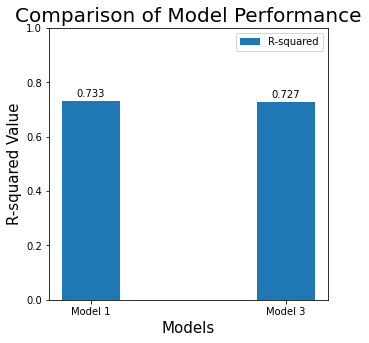

In [33]:
# Define x-axis and y-axis data values
x_labels = ['Model 1', 'Model 3']
rsquared = [r1, r3]

# Set the label locations and width of the bars
x = np.arange(len(x_labels))  
width = 0.3

plt.figure(figsize=(5,5))

# Plot side-by-side bars
bar = plt.bar(x, rsquared, width, label='R-squared')

# Customise the plot
plt.title('Comparison of Model Performance', fontsize = 20)
plt.ylabel('R-squared Value', fontsize = 15)
plt.xlabel('Models', fontsize = 15)
plt.xticks(x, x_labels)
plt.ylim(bottom = 0, top = 1.0)
plt.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        val = each.get_height()
        plt.annotate('{:.3f}'.format(val),
                    xy=(each.get_x() + each.get_width() / 2, val),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# Use the autolabel function to display data label for each bar       
autolabel(bar)

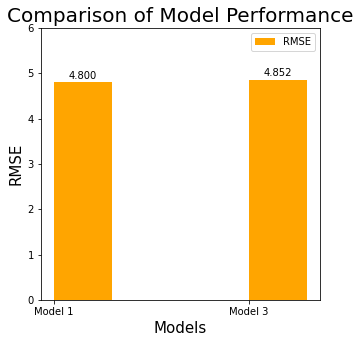

In [34]:
# Define x-axis and y-axis data values
x_labels = ['Model 1', 'Model 3']
rmse = [RMSE1, RMSE3]

# Set the label locations and width of the bars
x = np.arange(len(x_labels))  
width = 0.3

plt.figure(figsize=(5,5))

# Plot side-by-side bars
bar = plt.bar(x + width/2, rmse, width, color='orange', label='RMSE')

# Customise the plot
plt.title('Comparison of Model Performance', fontsize = 20)
plt.ylabel('RMSE', fontsize = 15)
plt.xlabel('Models', fontsize = 15)
plt.xticks(x, x_labels)
plt.ylim(bottom = 0, top = 6)
plt.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        val = each.get_height()
        plt.annotate('{:.3f}'.format(val),
                    xy=(each.get_x() + each.get_width() / 2, val),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# Use the autolabel function to display data label for each bar       
autolabel(bar)

As we can see, Model 1 (lm) - the base model, yielded the higher R-squared value and lower RMSE, suggesting that it is the better regression model to predict Boston housing prices.

However, considering that Model 3 (lm3) requires less features, with minimal compromise to R-squared value and RMSE, it can be considered as a candidate model when data is hard to gather.

## 5. Save a Trained Model for Future Use <a id='p5' />
### 5.1 Use `joblib` package to save trained models

In [35]:
# import required library to save trained models
import joblib

In [36]:
# Name the file (in pickle format)
file = "my_lm_model.pkl" 

# Save the parameters of the trained model in the file
joblib.dump(lm, file)

['my_lm_model.pkl']

### 5.2 Load Trained Models

In [37]:
# Load model from pickle file
lm_loaded = joblib.load(file)
lm_loaded

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Use the model to perform scoring using test data
lm_loaded.score(X_test, y_test)

0.7330247212691926